In [1]:
import networkx as nx
import numpy as np
import matplotlib

In [2]:
data = open('data/network_clustering.csv', 'rb')

network  = nx.read_edgelist( data, delimiter = ',', create_using=nx.Graph() )

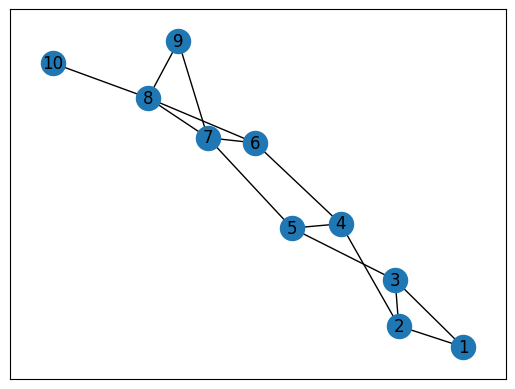

In [3]:
nx.draw_networkx( network )

## Community detection

See the [documentation](https://networkx.org/documentation/stable/reference/algorithms/community.html) for a full list of various community detection algorithms.

Unlike in R, networkx returns all communities which could be extracted using the algorithm. Therefore, we need to evaluate how good that is, e.g., what is the number of ties within the community and number of ties not outside the community compared with all ties. The higher the number, the better the community -- computationally.
See [documentation on partition_quality](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.quality.partition_quality.html).

In [22]:
from networkx.algorithms import community
from networkx.algorithms.community.quality import partition_quality

In [23]:
for com in community.girvan_newman( network ):
    print( com )
    print( "There are", len( com ), "communities" )
    print( partition_quality( network, com )[1] )

({'4', '3', '1', '2', '5'}, {'6', '8', '9', '10', '7'})
There are 2 communities
0.7777777777777778
({'4', '3', '1', '2', '5'}, {'6', '9', '8', '7'}, {'10'})
There are 3 communities
0.8222222222222222
({'2', '3', '1'}, {'5', '4'}, {'6', '9', '8', '7'}, {'10'})
There are 4 communities
0.8666666666666667
({'2', '3', '1'}, {'5', '4'}, {'6'}, {'9', '8', '7'}, {'10'})
There are 5 communities
0.8444444444444444
({'1'}, {'2', '3'}, {'5', '4'}, {'6'}, {'9', '8', '7'}, {'10'})
There are 6 communities
0.8
({'1'}, {'2'}, {'3'}, {'5', '4'}, {'6'}, {'9', '8', '7'}, {'10'})
There are 7 communities
0.7777777777777778
({'1'}, {'2'}, {'3'}, {'4'}, {'5'}, {'6'}, {'9', '8', '7'}, {'10'})
There are 8 communities
0.7555555555555555
({'1'}, {'2'}, {'3'}, {'4'}, {'5'}, {'6'}, {'7'}, {'9', '8'}, {'10'})
There are 9 communities
0.7111111111111111
({'1'}, {'2'}, {'3'}, {'4'}, {'5'}, {'6'}, {'7'}, {'8'}, {'9'}, {'10'})
There are 10 communities
0.6888888888888889


### Using clustering results

The clustering code provides a list of nodes and where they belong.

You may even use more advanced tricks for [plotting](https://stackoverflow.com/questions/43541376/how-to-draw-communities-with-networkx) communities.

In [24]:
communities = list( community.girvan_newman( network ) )[1]
print( communities )

({'4', '3', '1', '2', '5'}, {'6', '9', '8', '7'}, {'10'})


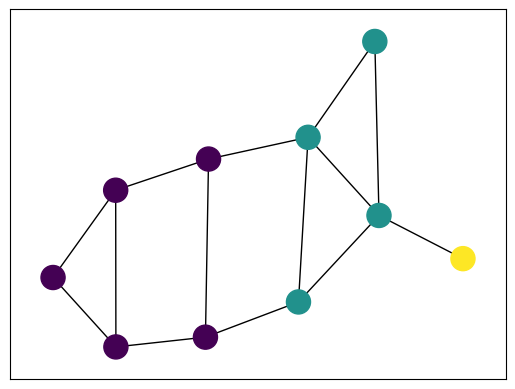

In [25]:
# for coloring this list, we need to have information in which cluster each node belongs in
# this taks care of it, by creating list of colors and assigning each node the the number where it belongs to

colors = [-1 for i in range( len( network.nodes ) )]
for i, nodes in enumerate( communities ):
    for n in nodes:
        n = int(n) - 1
        colors[ n ] = i

pos = nx.spring_layout( network )
nx.draw_networkx_nodes( network, pos, node_color = colors  )
nx.draw_networkx_edges( network, pos )

## Task

* move from the simple example dataset to organization x dataset
* modify the network so that different community detection algorithms lead to different outcomes